In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli, poisson
import matplotlib.pyplot as plt
import math

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Workbook Assignment 1: Basic probabilites & visualisations (1)

#### Solution 1. A)

#### As we know know there are only two outcomes in a Bernoulli trial. As given the P(vote = "for") = 0.87 so P(vote = "against") = 1 - 0.87

For 87.0 %
Against 13.0 %


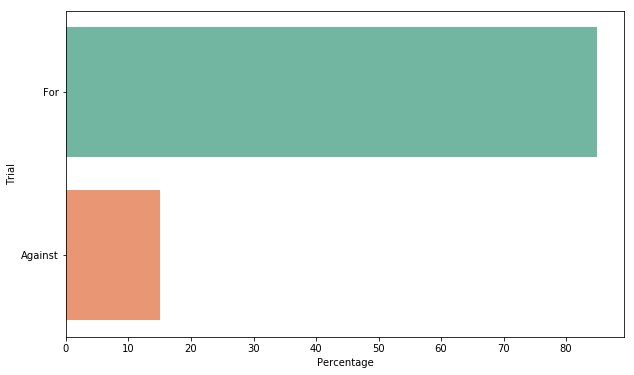

In [68]:
#defining probabilities
probFor = 0.87
probAgainst = 1-0.87

#Plotting the percentages
fig = plt.figure(figsize=(10,6))

#generating the random values with given probability
data_bern = bernoulli.rvs(size=100,p=probFor)

#converting the integer to for / againstb
converterFunc = lambda x: 'For' if x == 1 else 'Against'
data_bern = np.vectorize(converterFunc)(data_bern)

#converting the np array to pandas dataframe for plotting
df = pd.DataFrame({'Trial': data_bern})

#plotting the data using sns.countplot()
ax = sns.countplot(y="Trial",data=df,palette="Set2")


ax.set(xlabel='Percentage', ylabel='Trial')
print("For {} %".format(probFor*100), "Against {} %".format(probAgainst*100),sep='\n')

plt.show()

#### Calculating expectation

In [141]:
bernoulli.mean(probFor)

0.87

#### Solution 1. B)

In [116]:
# 𝜆 = 29
mu = 29
median, var = poisson.median(mu), poisson.var(mu)


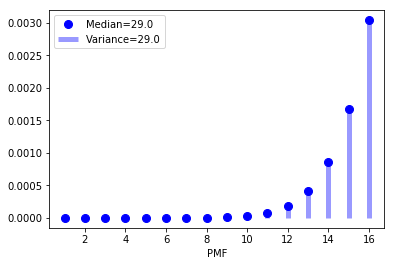

In [119]:
#pmf
fig, ax = plt.subplots(1, 1)
#get optimal k for pmf
k = 0
while poisson.pmf(k=k,mu=mu) < 0.005:
    k+=1
  
x = np.arange(1,k)

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.4)
ax.legend(["Median={}".format(median),"Variance={}".format(var)],loc="best" )
ax.set(xlabel="PMF")
plt.show()


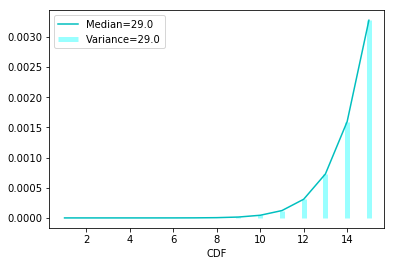

In [131]:
#cdf
fig, ax = plt.subplots(1, 1)
#get optimal k for cdf
k = 0
while poisson.cdf(k=k,mu=mu) < 0.005:
    k+=1
  
x = np.arange(1,k)

ax.plot(x, poisson.cdf(x, mu), 'c', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.cdf(x, mu), colors='aqua', lw=5, alpha=0.4)
ax.legend(["Median={}".format(median),"Variance={}".format(var)],loc="best" )
ax.set(xlabel="CDF")
plt.show()

#### Solution 1. C)

In [4]:
cdf = lambda x : (0.7 * math.exp(-0.5 * x)) + (0.28 * math.exp(-0.25 * x))
pdf = lambda x : (0.5 * 0.7 * math.exp(-0.5 * x)) + (0.25 * 0.28 * math.exp(-0.25 * x))

probLessThanFour = (1-cdf(4))
probLessThanTwo = (1-cdf(2))

print('Probability that we need to wait between 2 and 4 hours = {:.2f}'.format(probLessThanFour -  probLessThanTwo) )


Probability that we need to wait between 2 and 4 hours = 0.23


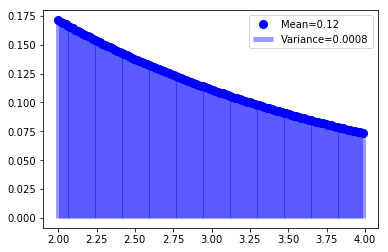

In [6]:

#plot of pdf
x = np.arange(2,4,0.016) #intervals from 2 - 4 with 0.016hr/1 minute as interval
y = np.vectorize(pdf)(x)

dfTwoFour = pd.DataFrame({"X": x , "Y":y})

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, 'bo', ms=8, label='pdf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.4)

metadata = dfTwoFour['Y'].describe()

ax.legend(['Mean={:.2f}'.format(metadata['mean']),'Variance={:.4f}'.format(metadata['std']**2),  ])




count    13.000000
mean      0.117064
std       0.030952
min       0.075572
25%       0.092294
50%       0.113071
75%       0.138941
max       0.171215
Name: Y, dtype: float64


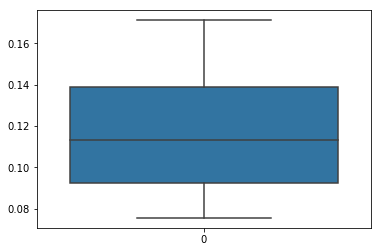

In [194]:
print(metadata)
#we can use the box plot to visualise the quartiles of the waiting time
sns.boxplot(data=y)
plt.show()

### Workbook Assignment 2 : Basic probabilities & visualisations (2)

#### Solution A

In [132]:
#loading the data

df = pd.DataFrame([[-0.088, 628.44] , [2.419, -524.8 ] , [-5.521, 512.98] , [ 0.951, 47.19 ] , [ -0.301,-708.95 ],
                  [-2.104, 842.34], [-1.478, 863.46], [0.584,-789.16] , [0.376, -832.03] , [ 6.771, -449.46 ],
                  [0.737, -286.69], [-5.713, 522.62] , [0.394, -168.06], [-7.655, 114.8], [-9.001,57.94],
                  [5.431, 202.99], [-4.108, 909.44], [6.719, 824.1], [0.682, 40.95], [4.912,-241.1]
                  ],columns=['X','Y'])

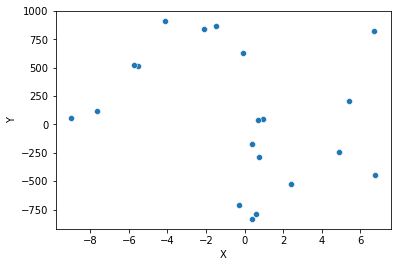

In [133]:
sns.scatterplot(data=df,x='X',y='Y')

In [134]:
# to caluclate the sample covariance let's first calculate means/expectations

x_mean = sum(df['X']) / 20
y_mean = sum(df['Y']) / 20

print('X mean = {}\nY mean = {}'.format(x_mean,y_mean))

X mean = -0.2996499999999998
Y mean = 78.35000000000004


In [142]:
#calculate covariance
def calc_cov(x,y):
    return sum((x - x_mean) * (y-y_mean)) / 19

calc_cov(df['X'],df['Y'])

-695.312175263158

##### We can confirm the correctness of our covariance by pandas inbuilt method

In [136]:
df.cov()['X']['Y']

-695.3121752631578

In [137]:
def calc_var(x,y):
    ans = {'x_var': 0 , 'y_var':0}
    ans['x_var'] = round(sum((x - x_mean) ** 2)  / 19 , 2)
    ans['y_var'] = round(sum((y - y_mean) ** 2)  / 19,2)
    return ans
    
calc_var(df['X'],df['Y'])

{'x_var': 19.87, 'y_var': 331318.97}

##### We can confirm the correctness of  varaince by pandas inbuilt method

In [138]:
df.var()

X        19.870693
Y    331318.974305
dtype: float64